In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/passSecData/data.csv", on_bad_lines='skip')

In [3]:
len(data)

669640

In [4]:
data.dropna(inplace=True)

In [5]:
len(data)

669639

In [6]:
df_0 = data[data.strength==0]
df_1 = data[data.strength==1]
df_2 = data[data.strength==2]

In [7]:
len(df_0),len(df_1),len(df_2)

(89701, 496801, 83137)

In [8]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_1, replace=False, n_samples=83137, random_state=123)

In [9]:
df_downsampled = pd.concat([df_majority_downsampled, df_0,df_2])

In [10]:
df_downsampled.strength.value_counts()

strength
0    89701
1    83137
2    83137
Name: count, dtype: int64

In [11]:
data=df_downsampled

In [12]:
data = np.array(data)

In [13]:
def remove_non_ascii(text):
    return text.encode('ascii', 'ignore').decode('ascii')

In [14]:
# remove all passwords with non-permitted chars
import re
cleanData=[]
regex = "^([a-z])([A-Z])(\d)([@$!%*#?&])$"
for i in data:
    t=remove_non_ascii(str(i[0]))
    cleanData.append([t,i[1]])
    

In [15]:
for i in cleanData:
    if len(str(i[0]))<6 or len(str(i[0]))>30:
        cleanData.remove(i)

In [16]:
import random
random.shuffle(cleanData)

In [17]:
X=[pw[0] for pw in cleanData]
y=[pw[1]for pw in cleanData]

In [18]:
X

['ahocine9',
 'bz1x7f',
 'bojan12345',
 '9Ll8r4zQ1Mwdel1Q',
 'gl93Y6idLdyUV6Y',
 'YvXoyyzg5MwPDeEK',
 '4yurie',
 'dfg666',
 '8l2zClDM3OAt5WMs',
 '5916984ch',
 'tonydize12',
 'lolpop1',
 'deko051983',
 'joseluis@@256523',
 'dum5c8t',
 'TizopIziWot431',
 'ibb98uo',
 'gzzaz55',
 'z70K4wsNEptmVfVu',
 'rooto01',
 'SRpab1DA2MQf5mJu',
 'Ry78WkDg3OA9n5nm',
 's_pring',
 'XVpTHdzk5MgGrGxd',
 'marmota69',
 'sparky101',
 'rubyt1',
 'ka1995',
 'anacristina18',
 'haluho252',
 'qyguwasi15',
 'tester1',
 'RYBAIBjU2NQ0Qkda',
 'xy1xyy2',
 'smaras1',
 'CA050NILO',
 'cdmn54j',
 'w7wwim9',
 'yul1u5',
 'DfnQQiTE4NwTLRTj',
 '10000brx',
 'sizer00',
 'db3raz',
 'celtic8',
 'mht92kzk',
 'sqroot7',
 'jeeta2',
 'tl1nhJTcyMAhVjLr',
 'aua4cms',
 'sc0rp10n',
 'P62Q5YjI2NAxshXH',
 'benefiel10',
 'usmakarim12345678900...',
 'lapelusa24',
 'olbap13',
 '121514good',
 'npz4jt4',
 'NKp4u0DQzMA742FN',
 '305xxl',
 '8lmJetzI1OAcD7r7',
 'glendale2000',
 'ywk0w367',
 'EvIXYDaMOPo819',
 'bybisyn792',
 'jVCb0ZDU5OAMwsYx',
 'wins

In [19]:
def toChar(inp):
    chars=[]
    for i in inp:
        chars.append(i)
    return chars

In [20]:
X=[toChar(i) for i in X]

In [21]:
X

[['a', 'h', 'o', 'c', 'i', 'n', 'e', '9'],
 ['b', 'z', '1', 'x', '7', 'f'],
 ['b', 'o', 'j', 'a', 'n', '1', '2', '3', '4', '5'],
 ['9',
  'L',
  'l',
  '8',
  'r',
  '4',
  'z',
  'Q',
  '1',
  'M',
  'w',
  'd',
  'e',
  'l',
  '1',
  'Q'],
 ['g', 'l', '9', '3', 'Y', '6', 'i', 'd', 'L', 'd', 'y', 'U', 'V', '6', 'Y'],
 ['Y',
  'v',
  'X',
  'o',
  'y',
  'y',
  'z',
  'g',
  '5',
  'M',
  'w',
  'P',
  'D',
  'e',
  'E',
  'K'],
 ['4', 'y', 'u', 'r', 'i', 'e'],
 ['d', 'f', 'g', '6', '6', '6'],
 ['8',
  'l',
  '2',
  'z',
  'C',
  'l',
  'D',
  'M',
  '3',
  'O',
  'A',
  't',
  '5',
  'W',
  'M',
  's'],
 ['5', '9', '1', '6', '9', '8', '4', 'c', 'h'],
 ['t', 'o', 'n', 'y', 'd', 'i', 'z', 'e', '1', '2'],
 ['l', 'o', 'l', 'p', 'o', 'p', '1'],
 ['d', 'e', 'k', 'o', '0', '5', '1', '9', '8', '3'],
 ['j',
  'o',
  's',
  'e',
  'l',
  'u',
  'i',
  's',
  '@',
  '@',
  '2',
  '5',
  '6',
  '5',
  '2',
  '3'],
 ['d', 'u', 'm', '5', 'c', '8', 't'],
 ['T', 'i', 'z', 'o', 'p', 'I', 'z', 'i', 'W'

In [22]:
train_text, test_text, train_y, test_y = train_test_split(X,y,test_size = 0.2)

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_NB_WORDS = 93

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_text)
sequences = tokenizer.texts_to_sequences(train_text)
sequences_test = tokenizer.texts_to_sequences(test_text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

d:\Projects\Thesis\workspaceThesis\myEnv\lib\site-packages\keras\src\legacy\preprocessing\text.py:98: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


Found 71 unique tokens.


In [24]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [25]:
index_to_word

{1: 'a',
 2: '1',
 3: 'e',
 4: 'o',
 5: 'i',
 6: 'n',
 7: 'm',
 8: '2',
 9: 't',
 10: '0',
 11: 'r',
 12: 's',
 13: 'u',
 14: 'd',
 15: 'l',
 16: '3',
 17: 'y',
 18: 'g',
 19: 'k',
 20: 'c',
 21: '9',
 22: '4',
 23: '5',
 24: 'w',
 25: 'j',
 26: 'z',
 27: 'h',
 28: 'q',
 29: 'p',
 30: '8',
 31: 'b',
 32: '7',
 33: '6',
 34: 'v',
 35: 'f',
 36: 'x',
 37: '.',
 38: '@',
 39: '-',
 40: '_',
 41: '!',
 42: '*',
 43: '#',
 44: '$',
 45: '/',
 46: ' ',
 47: '&',
 48: '+',
 49: '?',
 50: ';',
 51: ')',
 52: '%',
 53: '(',
 54: '^',
 55: '=',
 56: ']',
 57: '[',
 58: '<',
 59: '~',
 60: '>',
 61: '{',
 62: '}',
 63: '|',
 64: '\\',
 65: '`',
 66: '"',
 67: '\x7f',
 68: '\x1c',
 69: '\x12',
 70: '\x1b',
 71: '\x08'}

In [26]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 10.6
max length: 30


In [27]:
MAX_SEQUENCE_LENGTH = 30

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)

In [28]:
from keras.utils import to_categorical
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
y_test = to_categorical(np.asarray(y_test))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (204501, 3)


In [2]:
data = pd.read_csv("./data/oneWordSamplesWnumsSymbols.csv", on_bad_lines='skip', usecols=["Generations","Scores"])

In [3]:
data2= pd.read_csv("./data/twoWordSamplesWnumsSymbols.csv", on_bad_lines='skip',usecols=["Generations","Scores"])

In [4]:
data3= pd.read_csv("./data/threeWordSamplesWnumsSymbols.csv", on_bad_lines='skip',usecols=["Generations","Scores"])

In [5]:
data4= pd.read_csv("./data/fullSamplesWnumsSymbols.csv", on_bad_lines='skip',usecols=["Generations","Scores"])

In [6]:
frames=[data,data2,data3,data4]

In [7]:
data=pd.concat(frames, ignore_index=True)

In [8]:
data

,Generations,Scores
0,lives838,1
1,#escapin202,4
2,@look77,2
3,brought,0
4,*leaping916,3
...,...,...
2333055,ReallyInYourMindWellAre22,4
2333056,DyedMyHairBlackIWas0,4
2333057,_LookingSupersexyAllAroundThe,4
2333058,KnowWeGotTheSticky,4


In [9]:
len(data)

2333060

In [10]:
data.dropna(inplace=True)

In [11]:
len(data)

2333040

In [12]:
df_0 = data[data.Scores==0]
df_1 = data[data.Scores==1]
df_2 = data[data.Scores==2]
df_3 = data[data.Scores==3]
df_4 = data[data.Scores==4]

In [13]:
len(df_0)

143817

In [14]:
len(df_1)

489742

In [ ]:
len(df_2)

256576

In [ ]:
len(df_3)

471298

In [ ]:
len(df_4)

971607

In [15]:
from sklearn.utils import resample
df_1_downsampled = resample(df_1, replace=False, n_samples=143817, random_state=123)

In [16]:
from sklearn.utils import resample
df_2_downsampled = resample(df_2, replace=False, n_samples=143817, random_state=123)

In [17]:
from sklearn.utils import resample
df_3_downsampled = resample(df_3, replace=False, n_samples=143817, random_state=123)

In [18]:
from sklearn.utils import resample
df_4_downsampled = resample(df_4, replace=False, n_samples=143817, random_state=123)

In [19]:
df_downsampled = pd.concat([df_0,df_1_downsampled,df_2_downsampled,df_3_downsampled,df_4_downsampled])


In [20]:
df_downsampled.Scores.value_counts()

Scores
0    143817
1    143817
2    143817
3    143817
4    143817
Name: count, dtype: int64

In [21]:
data=df_downsampled

In [22]:
data = np.array(data)

In [23]:
def remove_non_ascii(text):
    return text.encode('ascii', 'ignore').decode('ascii')

In [24]:
# remove all passwords with non-permitted chars
import re
cleanData=[]
regex = "^([a-z])([A-Z])(\d)([@$!%*#?&])$"
for i in data:
    t=remove_non_ascii(str(i[0]))
    cleanData.append([t,i[1]])
    

In [ ]:
for i in cleanData:
    if len(str(i[0]))<6 or len(str(i[0]))>40:
        cleanData.remove(i)

KeyboardInterrupt: 

In [25]:
import random
random.shuffle(cleanData)

In [26]:
X=[pw[0] for pw in cleanData]
y=[pw[1]for pw in cleanData]

In [27]:
X

['thinking&1',
 '*JammingToHerFavoriteSong',
 'SeeThis',
 'TakeLong',
 'GetYou95',
 'PassinBy',
 'MoveWithTheShowerOfLotus',
 'SeeHim_',
 'ReallyReally',
 'FaceRememberSave89',
 'battle',
 '#LoveToBe',
 'recently*646',
 ')Making',
 'Freestyle!80',
 'Resting',
 'know',
 'days',
 '@FeelLike',
 '#NeverSaid',
 '@HostThineEphesian',
 'KeptHer#',
 '^OnlyOne',
 'feel',
 'ThoughtI!63',
 'describe',
 'WishI&17',
 'talk',
 'DecodeWordsOnTheWallThis',
 'WantsALove',
 'LeavesAbout',
 'begins1796',
 'PutThroughTheRainNameSketch87',
 'LookingOut',
 'knowing!0',
 'BreathingPraising',
 'free',
 'squeezed',
 'RappingBout',
 '*StayLoadedPleaseMyPocket4285',
 'love',
 'KnewWhat',
 'PassYoursWith9290',
 'goes',
 'GlowNearAnd#',
 'HeadingDownThe480',
 '@RoadsToMinorCitiesBrad',
 'PlayA',
 'DanceWithMe',
 '&TellYour',
 '(getting',
 '(LyingOnMyCloudStarts',
 'KnowHouse',
 'SipLeanPureCodeineIm821',
 'GetUpAh',
 'ReleaseNew#8369',
 'learn293',
 'SaidToYou*',
 'tougher1735',
 'just',
 'ResemblanceTo2',
 'remem

In [28]:
def toChar(inp):
    chars=[]
    for i in inp:
        chars.append(i)
    return chars

In [29]:
X=[toChar(i) for i in X]

In [ ]:
X

[['S',
  'i',
  'c',
  'k',
  'L',
  'i',
  't',
  't',
  'l',
  'e',
  'M',
  'a',
  's',
  'q',
  'u',
  'e',
  'r',
  'a',
  'd',
  'e',
  '4',
  '5'],
 ['W', 'a', 'i', 't', 'i', 'n', 'g', 'R', 'e', 'a', 'c', 'h'],
 ['M', 'e', 'n', 'W', 'h', 'e', 'n', ')'],
 ['U',
  'n',
  'd',
  'e',
  'r',
  's',
  't',
  'a',
  'n',
  'd',
  'J',
  'u',
  's',
  't',
  'T',
  'r',
  'y'],
 ['L', 'i', 'n', 'k', 'T', 'o', 'T', 'h', 'i', 's'],
 ['a', 'n', 's', 'w', 'e', 'r'],
 ['R', 'e', 'a', 'l', 'l', 'y', 'N', 'e', 'e', 'd', '6'],
 ['S', 't', 'a', 'y', 'T', 'o', 'm', 'o', 'r', 'r', 'o', 'w', 'I'],
 ['H',
  'u',
  'r',
  't',
  'U',
  'n',
  't',
  'i',
  'l',
  'I',
  'H',
  'u',
  'r',
  't',
  'A',
  'n',
  'd',
  'F',
  'l',
  'i',
  'r',
  't',
  '^'],
 ['S',
  't',
  'i',
  'g',
  'm',
  'a',
  'C',
  'a',
  'u',
  's',
  'e',
  'd',
  'B',
  'y',
  'H',
  'e',
  'l',
  'l',
  '1'],
 ['A',
  'c',
  'c',
  'o',
  'm',
  'p',
  'a',
  'n',
  'y',
  'i',
  'n',
  'g',
  'W',
  'o',
  'm',
  'e',

In [93]:
train_text, test_text, train_y, test_y = train_test_split(X,y,test_size = 0.1)

In [94]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
MAX_NB_WORDS = 93

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
sequences_test = tokenizer.texts_to_sequences(test_text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

d:\Projects\Thesis\workspaceThesis\myEnv\lib\site-packages\keras\src\legacy\preprocessing\text.py:98: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


Found 58 unique tokens.


In [95]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [96]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [97]:
index_to_word

{1: 'e',
 2: 't',
 3: 'o',
 4: 'n',
 5: 'i',
 6: 'a',
 7: 's',
 8: 'r',
 9: 'l',
 10: 'h',
 11: 'd',
 12: 'g',
 13: 'u',
 14: 'y',
 15: 'w',
 16: 'm',
 17: 'c',
 18: 'k',
 19: 'p',
 20: 'f',
 21: 'b',
 22: 'v',
 23: '0',
 24: '2',
 25: '1',
 26: '5',
 27: '9',
 28: '3',
 29: '7',
 30: '6',
 31: '8',
 32: '4',
 33: '$',
 34: '(',
 35: '@',
 36: '&',
 37: '!',
 38: '#',
 39: '_',
 40: '^',
 41: ')',
 42: '*',
 43: '%',
 44: 'j',
 45: 'z',
 46: 'x',
 47: 'q',
 48: '.',
 49: ':',
 50: '-',
 51: '/',
 52: ',',
 53: '?',
 54: '"',
 55: ';',
 56: "'",
 57: '+',
 58: '['}

In [98]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 11.0
max length: 65


In [99]:
MAX_SEQUENCE_LENGTH = 65

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)

In [100]:
from keras.utils import to_categorical
y_train = y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
y_test = to_categorical(np.asarray(y_test))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (719085, 5)


In [71]:
y_train.shape

(719085, 5)

In [72]:
x_train.shape

(719085, 65)

In [73]:
x_train.shape

(719085, 65)

In [114]:
import tensorflow as tf
from keras import layers, models
from sklearn.model_selection import KFold
from keras.optimizers import Adam

# Merge inputs and targets
# inputs = np.concatenate((x_train, x_test), axis=0)
# targets = np.concatenate((y_train, y_test), axis=0)
inputs=x_train
targets=y_train
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

acc_per_fold=[]
loss_per_fold=[]
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    optimizer=Adam(learning_rate=0.001)
    model = models.Sequential()
    model.add(layers.Input((65,),dtype='int32'))
    model.add(layers.Embedding(input_dim=93,output_dim=10, trainable=True))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(30,activation="relu"))
    model.add(layers.Dense(5,activation="softmax"))
    model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=50,
              verbose=1)

    # Generate generalization metrics
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
8989/8989 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6699 - loss: 0.7694 - precision_37: 0.7271 - recall_37: 0.5845
Epoch 2/50
8989/8989 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7468 - loss: 0.6117 - precision_37: 0.7769 - recall_37: 0.7073
Epoch 3/50
8989/8989 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7704 - loss: 0.5662 - precision_37: 0.8010 - recall_37: 0.7323
Epoch 4/50
8989/8989 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7813 - loss: 0.5438 - precision_37: 0.8101 - recall_37: 0.7448
Epoch 5/50
8989/8989 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7905 - loss: 0.5251 - precision_37: 0.8173 - recall_37: 0.7569
Epoch 6/50
8989/8989 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7985 - loss: 0.5084 - precision_37: 0.8224 - recall_37: 0.7687
Epoch 7/50
8989/8989 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8032 - loss: 0.4982 - precision_37: 0.8257

In [115]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.3891737461090088 - Accuracy: 85.33831238746643%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.37876370549201965 - Accuracy: 85.85980534553528%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.3905649781227112 - Accuracy: 84.96978878974915%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.393812894821167 - Accuracy: 85.15057563781738%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.3948206901550293 - Accuracy: 85.05809307098389%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 85.27531504631042 (+- 0.3167614796420142)
> Loss: 0.38942720293998717
---------------------------

In [31]:
from keras.utils import to_categorical
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=3, 
                    validation_split=.25)



Epoch 1/3


4793/4793 [==============================] - 9s 2ms/step - loss: 0.1082 - accuracy: 0.9548 - val_loss: 0.0048 - val_accuracy: 0.9989
Epoch 2/3
4793/4793 [==============================] - 8s 2ms/step - loss: 0.0612 - accuracy: 0.9723 - val_loss: 5.7716e-04 - val_accuracy: 0.9999
Epoch 3/3
4793/4793 [==============================] - 8s 2ms/step - loss: 0.0602 - accuracy: 0.9763 - val_loss: 5.5118e-04 - val_accuracy: 0.9999


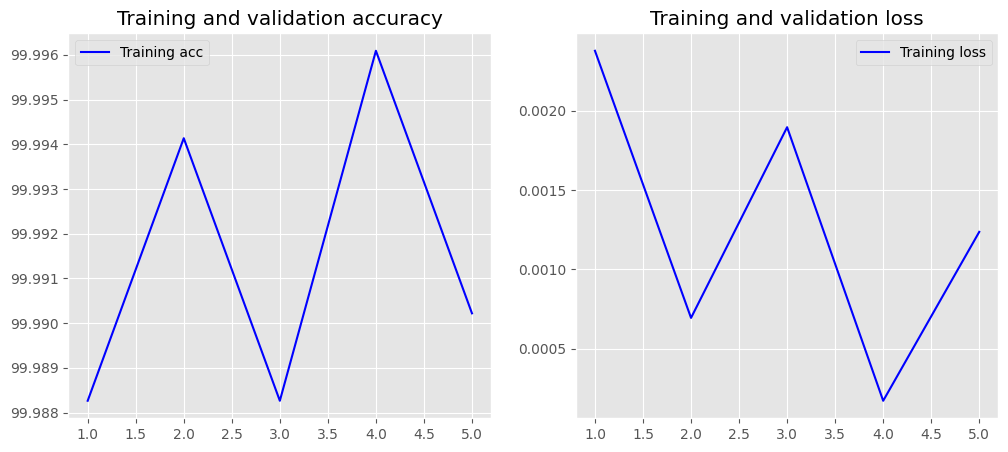

In [102]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = acc_per_fold
    #val_acc = history.history['val_accuracy']
    loss = loss_per_fold
    #val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    #plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    #plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)


In [116]:
print(model.evaluate(x_test,y_test))


2248/2248 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8539 - loss: 0.3880 - precision_41: 0.8673 - recall_41: 0.8381
[0.38671278953552246, 0.8539543151855469, 0.8676191568374634, 0.8386015892028809]


In [117]:
from sklearn.metrics import roc_auc_score
output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test,multi_class="ovr"))

2248/2248 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
test auc: 0.9770502645947085


In [39]:
output_test[0:20]

array([[9.99998927e-01, 1.02371689e-06, 0.00000000e+00],
       [0.00000000e+00, 6.02749064e-20, 1.00000000e+00],
       [0.00000000e+00, 4.30624774e-13, 1.00000000e+00],
       [0.00000000e+00, 5.10095961e-05, 9.99948978e-01],
       [0.00000000e+00, 4.32249993e-13, 1.00000000e+00],
       [8.44627692e-08, 9.99999881e-01, 0.00000000e+00],
       [1.00558989e-36, 1.00000000e+00, 4.63572764e-33],
       [0.00000000e+00, 4.46345516e-13, 1.00000000e+00],
       [9.99999881e-01, 6.11593407e-08, 0.00000000e+00],
       [1.28950308e-08, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.44790223e-08, 0.00000000e+00],
       [1.00000000e+00, 5.74837031e-08, 0.00000000e+00],
       [1.00000000e+00, 1.51845312e-19, 0.00000000e+00],
       [0.00000000e+00, 1.23045245e-08, 1.00000000e+00],
       [1.00000000e+00, 4.44607950e-09, 0.00000000e+00],
       [0.00000000e+00, 7.28448985e-13, 1.00000000e+00],
       [1.00000000e+00, 7.42381268e-10, 0.00000000e+00],
       [0.00000000e+00, 3.02845

In [232]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
